# Steven Ly - data visualisation exercise 19-5-2024

Ik heb gekozen voor de derde visualisation exercise (The hood network), ik heb de dataset van de buurtgegevens van Eindhoven in 2022 gebruikt. De bron van de dataset is: https://eindhoven.incijfers.nl/jive. 

De dataset bevat informatie over verschillende buurten in Eindhoven, zoals het gemiddelde jaarinkomen, het percentage mensen dat last heeft van geluidshinder, het percentage mensen dat zich ongelukkig voelt en het percentage mensen dat een slechte gezondheid heeft. Ik heb de dataset geanalyseerd en gevisualiseerd om inzicht te krijgen in de relatie tussen het gemiddelde jaarinkomen en de andere variabelen.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import linear_cmap
from bokeh.io import output_notebook

In [47]:
df = pd.read_csv('Buurtgegevens - 2022 - Buurten.csv', sep=';')

In [56]:
new_names = {'Gemiddeld persoonlijk inkomen per inkomensontvanger (x1000 euro)|2022': 'Gemiddelde jaarlijksinkomen',
             'heeft last van (minstens 1 vorm van) geluidshinder %|2022': 'Last van geluidshinder',
             'Voelt zich niet zo gelukkig of ongelukkig|2022':'Ongelukkig',
             'Beoordeling eigen gezondheid: matig of slecht|2022': 'Slechte gezondheid'}

df = df.rename(columns=new_names)

In [49]:
# Data cleaning
df = df[df["Gemiddelde jaarlijksinkomen"] != "."]

df['Gemiddelde jaarlijksinkomen'] = df['Gemiddelde jaarlijksinkomen'].str.replace(',', '.')
df['Gemiddelde jaarlijksinkomen'] = df['Gemiddelde jaarlijksinkomen'].astype(float)
df['Last van geluidshinder'] = df['Last van geluidshinder'].astype(int)
df['Ongelukkig'] = df['Ongelukkig'].astype(int)
df['Slechte gezondheid'] = df['Slechte gezondheid'].astype(int)

<Axes: xlabel='Gemiddelde jaarlijksinkomen', ylabel='Buurten'>

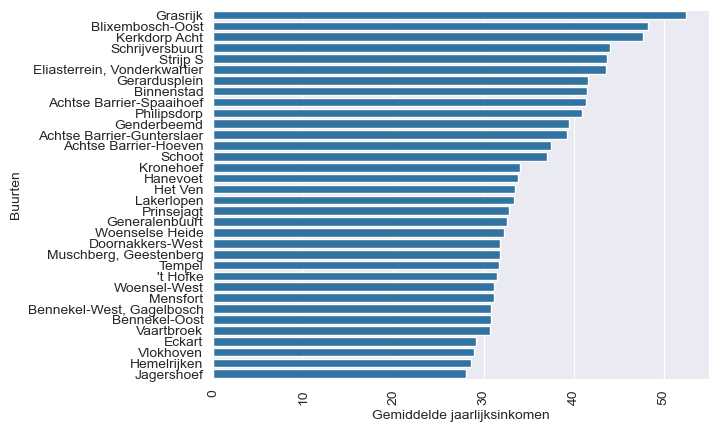

In [57]:
# Barplot
df = df.sort_values('Gemiddelde jaarlijksinkomen', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='Gemiddelde jaarlijksinkomen', y='Buurten', data=df)

# Bins maken


Bins zijn een manier om continue data te categoriseren. Ik gebruik bins zodat we makkelijk differentiatie kunnen maken tussen de rijke en minder rijke buurten. Ik maak bins op basis van de gemiddelde jaarinkomen.

Aan de hand van de bovenstaande barplot is te zien dat een groot verschil zit in het jaarlijks in komen tussen Kerkdrop Acht en Schrijversbuurt, Schoot en Kronehoef. Deze verschillen zijn ook te zien in de bins die we gaan maken.

In [52]:
min_wealth = df['Gemiddelde jaarlijksinkomen'].min()
max_wealth = df['Gemiddelde jaarlijksinkomen'].max()
bin_amount = 3
df['Bin'] = pd.cut(df['Gemiddelde jaarlijksinkomen'], bins=bin_amount, labels=range(1, bin_amount + 1))
df['Bin'] = df['Bin'].astype(int)
df

,Buurten,Gemiddelde jaarlijksinkomen,Last van geluidshinder,Ongelukkig,Slechte gezondheid,Bin
41,Grasrijk,52.4,45,2,6,3
11,Blixembosch-Oost,48.2,45,3,12,3
55,Kerkdorp Acht,47.7,74,3,10,3
90,Schrijversbuurt,44.0,49,8,6,2
94,Strijp S,43.7,65,9,10,2
26,"Eliasterrein, Vonderkwartier",43.6,46,5,8,2
38,Gerardusplein,41.6,45,6,10,2
9,Binnenstad,41.5,76,5,6,2
2,Achtse Barrier-Spaaihoef,41.4,67,4,11,2
79,Philipsdorp,40.9,53,7,13,2


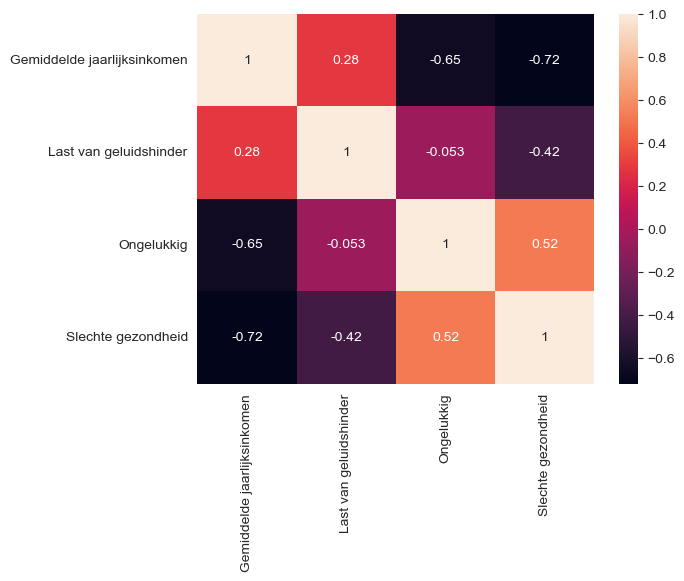

In [53]:
# Heatmap
correlation_matrix = df[['Gemiddelde jaarlijksinkomen', 'Last van geluidshinder', 'Ongelukkig', 'Slechte gezondheid']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Uit de heatmap kunnen we concluderen dat er een correlatie is van 0.52 tussen het gemiddelde jaarinkomen en het percentage mensen dat ongelukkig is. Verder is er een lichte correlatie tussen het gemiddelde jaarinkomen en het percentage mensen die geluidslast ervaren.

# Scatterplot

Met behulp van een scatterplot kunnen we de relatie tussen het gemiddelde jaarinkomen en het percentage mensen dat ongelukkig is visualiseren. We maken een scatterplot voor elke bin om te zien of er een verschil is in de relatie tussen het gemiddelde jaarinkomen en het percentage mensen dat ongelukkig is. Ik heb eerst seaborn gebruikt voor visualisatie, maar ik heb besloten om over te stappen naar bokeh omdat het interactieve mogelijkheden biedt. We kunnen hierdoor de individuele buurten zien door met de muis over de punten te bewegen.

In [54]:
source = ColumnDataSource(df)
p = figure(title="Gemiddelde jaarlijksinkomen vs ongelukkigheid in %", x_axis_label="Gemiddelde jaarlijksinkomen", y_axis_label="Ongelukkig")

circle_renderer = p.circle('Gemiddelde jaarlijksinkomen', 'Ongelukkig', source=source, color=linear_cmap('Bin', 'Viridis256', 1, bin_amount), size=10, legend_field='Bin')

hover = HoverTool()

hover.tooltips = [
    ("Buurt", "@Buurten"),
    ("Inkomen", "@{Gemiddelde jaarlijksinkomen}{0,0}"), 
    ("% Ongelukkig", "@Ongelukkig{0.1f}"),
]

p.add_tools(hover)

output_notebook()
show(p)

Loading BokehJS ...

In [55]:
p = figure(title="Gemiddelde jaarlijksinkomen vs slechte gezondheid in %", x_axis_label="Gemiddelde jaarlijksinkomen", y_axis_label="Slechte gezondheid")

circle_renderer = p.circle('Gemiddelde jaarlijksinkomen', 'Slechte gezondheid', source=source, color=linear_cmap('Bin', 'Viridis256', 1, bin_amount), size=10, legend_field='Bin')

hover = HoverTool()

hover.tooltips = [
    ("Buurt", "@Buurten"),
    ("Inkomen", "@{Gemiddelde jaarlijksinkomen}{0,0}"), 
    ("% Slechte gezondheid", "@{Slechte gezondheid}{0.1f}"),
]

p.add_tools(hover)

output_notebook()
show(p)

Loading BokehJS ...

Uit de scatterplot kunnen we concluderen dat er een sterke relatie is tussen het gemiddelde jaarinkomen en het percentage mensen dat ongelukkig is. Buurten met een hoger gemiddeld jaarinkomen hebben over het algemeen een lager percentage mensen dat ongelukkig is. Verder is er een relatie tussen het gemiddelde jaarinkomen en het percentage mensen dat een slechte gezondheid heeft. Buurten met een hoger gemiddeld jaarinkomen hebben over het algemeen een lager percentage mensen dat een slechte gezondheid heeft.